In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpezomwg2y/pubring.gpg' created
gpg: /tmp/tmpezomwg2y/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip install -q keras

In [0]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [0]:
def load_data(data_path: str, test_size=0.2, random_state=42, info=False):
    """Load data from file.
    
    Args:
        data_path: str, file path to read data
        test_size: float, the ratio of test / all
        random_state: int, random seed to split data
        info: bool, control info print
    Returns:
        train_data: np.array, train set
        test_data: np.array, test set
    """
    # imgs = [np.array(Image.open(d)) for d in Path(data_path).iterdir()]
    imgs = []
    for d in Path(data_path).iterdir():
        if info:
            print('Load image: ' + d.name)
        imgs.append(np.array(Image.open(d)))
    data = np.array(imgs)
    train_data, test_data = train_test_split(
        data, test_size=test_size, random_state=random_state)
    return train_data, test_data

In [0]:
def load_label(label_path: str, test_size=0.2, random_state=42):
    """Load label from file.
    
    Args:
        label_path: str, file path to read label
        test_size: float, the ratio of test / all, 
            this arg should match up test_size in load_data
        random_state: int, random seed to split data
            this arg should match up random_state in load_data
    """
    with open(label_path, 'r') as f:
        labels = f.readline()
    train_label, test_label = train_test_split(
        labels.split('\t'), test_size=test_size, random_state=random_state)
    le = LabelEncoder()
    le.fit(train_label)
    return le.transform(train_label), le.transform(test_label)

In [0]:
train_label, test_label = load_label('./drive/data/FacePlace/AsianSample.txt')

In [35]:
train_data, test_data = load_data('./drive/data/FacePlace/AsianSample/', info=True)

Load image: AM0302_1100_60L.jpg
Load image: AM0302_1100_30L.jpg
Load image: AM0302_1100_45L.jpg
Load image: AM0302_1100_45R.jpg
Load image: AM0302_1100_DI.jpg
Load image: AM0302_1100_HA.jpg
Load image: AM0302_1100_SU.jpg
Load image: AM0302_1100_NE.jpg
Load image: AM0302_2201_30L.jpg
Load image: AM0302_1100_SA.jpg
Load image: AM0302_2201_00F.jpg
Load image: AM0302_2201_45L.jpg
Load image: AM0302_2201_45R.jpg
Load image: AM0302_2201_30R.jpg
Load image: AM0302_2201_60L.jpg
Load image: AM0302_2201_90L.jpg
Load image: AM0303_1100_30L.jpg
Load image: AM0303_1100_00F.jpg
Load image: AM0302_2201_90R.jpg
Load image: AM0302_2201_NE.jpg
Load image: AM0303_1100_45R.jpg
Load image: AM0302_2201_60R.jpg
Load image: AM0303_1100_45L.jpg
Load image: AM0303_1100_30R.jpg
Load image: AM0303_1100_60L.jpg
Load image: AM0303_1100_HA.jpg
Load image: AM0303_2201_00F.jpg
Load image: AM0303_1100_NE.jpg
Load image: AM0303_1100_60R.jpg
Load image: AM0303_1100_DI.jpg
Load image: AM0303_1100_SA.jpg
Load image: AM0303

In [0]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)
train_label, val_label = train_test_split(train_label, test_size=0.1, random_state=42)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # randomly flip images
datagen.fit(train_data)

In [0]:
from keras import layers
from keras import models
from keras import optimizers

In [0]:
def vanilia_cnn(input_shape: tuple, classes: int):
    """Implement vanilla ConvNet model."""
    model = models.Sequential()
    model.add(
        layers.Conv2D(32, (3, 3), activation='relu',
                      padding='same',
                      input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [41]:
model = vanilia_cnn(input_shape=train_data[0].shape, classes=train_label.max() + 1)
history = model.fit_generator(
    datagen.flow(train_data, train_label, batch_size=32),
    epochs=200, validation_data=(val_data, val_label))

# epochs = 100

# for e in range(epochs):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in datagen.flow(train_data, train_label, batch_size=10):
#         model.fit(x_batch, y_batch)
#         batches += 1
#         if batches >= len(train_data):
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break
#         model.evaluate(val_data, val_label)

Epoch 1/200
6/6 [==============================] - 10s 2s/step - loss: 2.4458 - acc: 0.1006 - val_loss: 2.2987 - val_acc: 0.1818
Epoch 2/200
6/6 [==============================] - 4s 712ms/step - loss: 2.3048 - acc: 0.0957 - val_loss: 2.2943 - val_acc: 0.1364
Epoch 3/200
6/6 [==============================] - 4s 714ms/step - loss: 2.2919 - acc: 0.1313 - val_loss: 2.2767 - val_acc: 0.1818
Epoch 4/200
6/6 [==============================] - 4s 714ms/step - loss: 2.2612 - acc: 0.1165 - val_loss: 2.2990 - val_acc: 0.1364
Epoch 5/200
6/6 [==============================] - 4s 713ms/step - loss: 2.2664 - acc: 0.1374 - val_loss: 2.2670 - val_acc: 0.2273
Epoch 6/200
6/6 [==============================] - 4s 712ms/step - loss: 2.1837 - acc: 0.1264 - val_loss: 2.2385 - val_acc: 0.1364
Epoch 7/200
6/6 [==============================] - 4s 713ms/step - loss: 2.1194 - acc: 0.2528 - val_loss: 2.3847 - val_acc: 0.1818
Epoch 8/200
6/6 [==============================] - 4s 707ms/step - loss: 2.1662 - acc

6/6 [==============================] - 4s 713ms/step - loss: 1.8729 - acc: 0.3687 - val_loss: 2.5877 - val_acc: 0.0909
Epoch 16/200
6/6 [==============================] - 4s 710ms/step - loss: 1.8679 - acc: 0.3623 - val_loss: 2.3662 - val_acc: 0.0909
Epoch 17/200
6/6 [==============================] - 4s 715ms/step - loss: 1.7099 - acc: 0.4061 - val_loss: 2.4595 - val_acc: 0.0909
Epoch 18/200
6/6 [==============================] - 4s 715ms/step - loss: 1.7250 - acc: 0.4012 - val_loss: 2.7158 - val_acc: 0.0909
Epoch 19/200
6/6 [==============================] - 4s 715ms/step - loss: 1.7319 - acc: 0.4313 - val_loss: 2.3274 - val_acc: 0.0909
Epoch 20/200
6/6 [==============================] - 4s 705ms/step - loss: 1.6856 - acc: 0.4368 - val_loss: 2.4913 - val_acc: 0.0909
Epoch 21/200
6/6 [==============================] - 4s 710ms/step - loss: 1.6549 - acc: 0.4359 - val_loss: 2.2480 - val_acc: 0.1818
Epoch 22/200
6/6 [==============================] - 4s 712ms/step - loss: 1.5882 - acc: 0

6/6 [==============================] - 4s 709ms/step - loss: 1.1398 - acc: 0.5429 - val_loss: 5.6351 - val_acc: 0.3182
Epoch 30/200
6/6 [==============================] - 4s 715ms/step - loss: 0.9901 - acc: 0.6536 - val_loss: 6.4438 - val_acc: 0.1818
Epoch 31/200
6/6 [==============================] - 4s 713ms/step - loss: 1.1943 - acc: 0.5829 - val_loss: 5.7957 - val_acc: 0.2273
Epoch 32/200
6/6 [==============================] - 4s 713ms/step - loss: 0.9779 - acc: 0.5844 - val_loss: 6.5643 - val_acc: 0.1364
Epoch 33/200
6/6 [==============================] - 4s 714ms/step - loss: 0.8536 - acc: 0.6838 - val_loss: 7.2991 - val_acc: 0.1364
Epoch 34/200
6/6 [==============================] - 4s 714ms/step - loss: 0.7777 - acc: 0.7098 - val_loss: 7.5615 - val_acc: 0.0909
Epoch 35/200
6/6 [==============================] - 4s 711ms/step - loss: 0.8665 - acc: 0.6632 - val_loss: 7.1574 - val_acc: 0.0909
Epoch 36/200
6/6 [==============================] - 4s 711ms/step - loss: 0.7434 - acc: 0

6/6 [==============================] - 4s 712ms/step - loss: 0.6965 - acc: 0.7525 - val_loss: 6.8122 - val_acc: 0.0455
Epoch 44/200
6/6 [==============================] - 4s 710ms/step - loss: 0.7178 - acc: 0.7838 - val_loss: 4.6536 - val_acc: 0.1818
Epoch 45/200
6/6 [==============================] - 4s 715ms/step - loss: 0.6660 - acc: 0.7791 - val_loss: 4.5593 - val_acc: 0.0909
Epoch 46/200
6/6 [==============================] - 4s 714ms/step - loss: 0.4584 - acc: 0.8466 - val_loss: 7.1502 - val_acc: 0.0909
Epoch 47/200
6/6 [==============================] - 4s 711ms/step - loss: 0.5253 - acc: 0.7945 - val_loss: 5.5526 - val_acc: 0.0909
Epoch 48/200
6/6 [==============================] - 4s 713ms/step - loss: 0.4538 - acc: 0.8310 - val_loss: 5.2885 - val_acc: 0.1364
Epoch 49/200
6/6 [==============================] - 4s 713ms/step - loss: 0.4389 - acc: 0.8528 - val_loss: 4.7572 - val_acc: 0.0909
Epoch 50/200
6/6 [==============================] - 4s 714ms/step - loss: 0.5169 - acc: 0

6/6 [==============================] - 4s 712ms/step - loss: 0.4525 - acc: 0.8322 - val_loss: 8.4593 - val_acc: 0.1364
Epoch 58/200
6/6 [==============================] - 4s 716ms/step - loss: 0.4472 - acc: 0.8635 - val_loss: 8.2014 - val_acc: 0.0909
Epoch 59/200
6/6 [==============================] - 4s 714ms/step - loss: 0.4588 - acc: 0.8577 - val_loss: 9.9361 - val_acc: 0.0455
Epoch 60/200
6/6 [==============================] - 4s 712ms/step - loss: 0.3442 - acc: 0.8638 - val_loss: 9.1447 - val_acc: 0.0455
Epoch 61/200
6/6 [==============================] - 4s 711ms/step - loss: 0.4988 - acc: 0.8104 - val_loss: 10.7282 - val_acc: 0.0455
Epoch 62/200
6/6 [==============================] - 4s 710ms/step - loss: 0.4600 - acc: 0.8632 - val_loss: 8.5166 - val_acc: 0.0455
Epoch 63/200
6/6 [==============================] - 4s 708ms/step - loss: 0.3256 - acc: 0.9000 - val_loss: 8.6162 - val_acc: 0.0455
Epoch 64/200
6/6 [==============================] - 4s 716ms/step - loss: 0.4171 - acc: 

6/6 [==============================] - 4s 708ms/step - loss: 0.3896 - acc: 0.8730 - val_loss: 7.0727 - val_acc: 0.0909
Epoch 72/200
6/6 [==============================] - 4s 713ms/step - loss: 0.4881 - acc: 0.8466 - val_loss: 10.1315 - val_acc: 0.1364
Epoch 73/200
6/6 [==============================] - 4s 713ms/step - loss: 0.6249 - acc: 0.7896 - val_loss: 7.4557 - val_acc: 0.0909
Epoch 74/200
6/6 [==============================] - 4s 715ms/step - loss: 0.5006 - acc: 0.8727 - val_loss: 8.4059 - val_acc: 0.1364
Epoch 75/200
6/6 [==============================] - 4s 715ms/step - loss: 0.3668 - acc: 0.8583 - val_loss: 6.7985 - val_acc: 0.1364
Epoch 76/200
6/6 [==============================] - 4s 716ms/step - loss: 0.2402 - acc: 0.9104 - val_loss: 7.9261 - val_acc: 0.1364
Epoch 77/200
6/6 [==============================] - 4s 712ms/step - loss: 0.2755 - acc: 0.9055 - val_loss: 9.5461 - val_acc: 0.0909
Epoch 78/200
6/6 [==============================] - 4s 715ms/step - loss: 0.2685 - acc: 

6/6 [==============================] - 4s 712ms/step - loss: 0.3043 - acc: 0.8884 - val_loss: 7.1681 - val_acc: 0.0909
Epoch 86/200
6/6 [==============================] - 4s 733ms/step - loss: 0.1899 - acc: 0.9368 - val_loss: 8.6997 - val_acc: 0.1364
Epoch 87/200
6/6 [==============================] - 4s 736ms/step - loss: 0.2412 - acc: 0.9156 - val_loss: 8.9151 - val_acc: 0.0909
Epoch 88/200
6/6 [==============================] - 4s 727ms/step - loss: 0.2181 - acc: 0.9003 - val_loss: 10.2107 - val_acc: 0.0909
Epoch 89/200
6/6 [==============================] - 4s 733ms/step - loss: 0.1474 - acc: 0.9420 - val_loss: 10.2909 - val_acc: 0.0909
Epoch 90/200
6/6 [==============================] - 4s 726ms/step - loss: 0.2148 - acc: 0.9264 - val_loss: 9.6930 - val_acc: 0.0909
Epoch 91/200
6/6 [==============================] - 4s 720ms/step - loss: 0.2134 - acc: 0.9058 - val_loss: 10.2496 - val_acc: 0.0909
Epoch 92/200
6/6 [==============================] - 4s 728ms/step - loss: 0.1751 - acc

6/6 [==============================] - 4s 723ms/step - loss: 0.1847 - acc: 0.9261 - val_loss: 8.8478 - val_acc: 0.0909
Epoch 100/200
6/6 [==============================] - 4s 714ms/step - loss: 0.2143 - acc: 0.9316 - val_loss: 8.2548 - val_acc: 0.1364
Epoch 101/200
6/6 [==============================] - 4s 724ms/step - loss: 0.1507 - acc: 0.9525 - val_loss: 7.2562 - val_acc: 0.1364
Epoch 102/200
6/6 [==============================] - 4s 720ms/step - loss: 0.1719 - acc: 0.9417 - val_loss: 8.0213 - val_acc: 0.1364
Epoch 103/200
6/6 [==============================] - 4s 721ms/step - loss: 0.2819 - acc: 0.8779 - val_loss: 6.8517 - val_acc: 0.2273
Epoch 104/200
6/6 [==============================] - 4s 719ms/step - loss: 0.1785 - acc: 0.9417 - val_loss: 6.6697 - val_acc: 0.1818
Epoch 105/200
6/6 [==============================] - 4s 724ms/step - loss: 0.1602 - acc: 0.9577 - val_loss: 8.0644 - val_acc: 0.1818
Epoch 106/200
6/6 [==============================] - 4s 716ms/step - loss: 0.1527 -

6/6 [==============================] - 4s 724ms/step - loss: 0.1930 - acc: 0.9113 - val_loss: 10.1685 - val_acc: 0.0909
Epoch 114/200
6/6 [==============================] - 4s 710ms/step - loss: 0.2071 - acc: 0.9417 - val_loss: 8.0293 - val_acc: 0.1364
Epoch 115/200
6/6 [==============================] - 4s 717ms/step - loss: 0.1796 - acc: 0.9423 - val_loss: 9.3829 - val_acc: 0.0909
Epoch 116/200
6/6 [==============================] - 4s 718ms/step - loss: 0.1828 - acc: 0.9154 - val_loss: 9.7114 - val_acc: 0.0909
Epoch 117/200
6/6 [==============================] - 4s 716ms/step - loss: 0.1335 - acc: 0.9632 - val_loss: 9.1214 - val_acc: 0.1364
Epoch 118/200
6/6 [==============================] - 4s 713ms/step - loss: 0.1571 - acc: 0.9313 - val_loss: 9.5513 - val_acc: 0.1364
Epoch 119/200
6/6 [==============================] - 4s 716ms/step - loss: 0.2168 - acc: 0.9374 - val_loss: 9.3104 - val_acc: 0.1364
Epoch 120/200
6/6 [==============================] - 4s 710ms/step - loss: 0.1956 

6/6 [==============================] - 4s 735ms/step - loss: 0.1700 - acc: 0.9264 - val_loss: 10.0636 - val_acc: 0.2273
Epoch 128/200
6/6 [==============================] - 4s 712ms/step - loss: 0.1701 - acc: 0.9420 - val_loss: 8.6286 - val_acc: 0.1818
Epoch 129/200
6/6 [==============================] - 4s 715ms/step - loss: 0.1145 - acc: 0.9414 - val_loss: 7.9047 - val_acc: 0.1818
Epoch 130/200
6/6 [==============================] - 4s 712ms/step - loss: 0.1549 - acc: 0.9531 - val_loss: 9.0464 - val_acc: 0.0909
Epoch 131/200
6/6 [==============================] - 4s 713ms/step - loss: 0.1788 - acc: 0.9371 - val_loss: 8.7507 - val_acc: 0.0909
Epoch 132/200
6/6 [==============================] - 4s 714ms/step - loss: 0.0909 - acc: 0.9583 - val_loss: 9.1740 - val_acc: 0.1364
Epoch 133/200
6/6 [==============================] - 4s 713ms/step - loss: 0.1339 - acc: 0.9478 - val_loss: 9.4792 - val_acc: 0.1818
Epoch 134/200
6/6 [==============================] - 4s 714ms/step - loss: 0.1068 

6/6 [==============================] - 4s 710ms/step - loss: 0.1233 - acc: 0.9583 - val_loss: 9.6568 - val_acc: 0.1364
Epoch 142/200
6/6 [==============================] - 4s 711ms/step - loss: 0.1857 - acc: 0.9267 - val_loss: 10.5452 - val_acc: 0.1818
Epoch 143/200
6/6 [==============================] - 4s 713ms/step - loss: 0.1646 - acc: 0.9417 - val_loss: 10.5578 - val_acc: 0.1364
Epoch 144/200
6/6 [==============================] - 4s 714ms/step - loss: 0.2080 - acc: 0.9261 - val_loss: 10.5906 - val_acc: 0.0909
Epoch 145/200
6/6 [==============================] - 4s 712ms/step - loss: 0.1027 - acc: 0.9580 - val_loss: 10.4973 - val_acc: 0.0909
Epoch 146/200
6/6 [==============================] - 4s 716ms/step - loss: 0.1006 - acc: 0.9841 - val_loss: 10.4894 - val_acc: 0.1364
Epoch 147/200
6/6 [==============================] - 4s 715ms/step - loss: 0.0818 - acc: 0.9736 - val_loss: 10.2771 - val_acc: 0.1364
Epoch 148/200
6/6 [==============================] - 4s 713ms/step - loss: 0.

6/6 [==============================] - 4s 714ms/step - loss: 0.0848 - acc: 0.9739 - val_loss: 8.7166 - val_acc: 0.1818
Epoch 156/200
6/6 [==============================] - 4s 711ms/step - loss: 0.1911 - acc: 0.9420 - val_loss: 10.2969 - val_acc: 0.1364
Epoch 157/200
6/6 [==============================] - 4s 713ms/step - loss: 0.1868 - acc: 0.9316 - val_loss: 9.5423 - val_acc: 0.1364
Epoch 158/200
6/6 [==============================] - 4s 715ms/step - loss: 0.0901 - acc: 0.9736 - val_loss: 8.4303 - val_acc: 0.1364
Epoch 159/200
6/6 [==============================] - 4s 710ms/step - loss: 0.0971 - acc: 0.9577 - val_loss: 9.5621 - val_acc: 0.0909
Epoch 160/200
6/6 [==============================] - 4s 707ms/step - loss: 0.1358 - acc: 0.9528 - val_loss: 10.1605 - val_acc: 0.0455
Epoch 161/200
6/6 [==============================] - 4s 711ms/step - loss: 0.0638 - acc: 0.9684 - val_loss: 10.2794 - val_acc: 0.0909
Epoch 162/200
6/6 [==============================] - 4s 713ms/step - loss: 0.100

6/6 [==============================] - 4s 713ms/step - loss: 0.1160 - acc: 0.9580 - val_loss: 8.5035 - val_acc: 0.1364
Epoch 170/200
6/6 [==============================] - 4s 711ms/step - loss: 0.0691 - acc: 0.9736 - val_loss: 8.4781 - val_acc: 0.1818
Epoch 171/200
6/6 [==============================] - 4s 710ms/step - loss: 0.1197 - acc: 0.9478 - val_loss: 7.6455 - val_acc: 0.1818
Epoch 172/200
6/6 [==============================] - 4s 711ms/step - loss: 0.0920 - acc: 0.9739 - val_loss: 7.2598 - val_acc: 0.1818
Epoch 173/200
6/6 [==============================] - 4s 715ms/step - loss: 0.0939 - acc: 0.9687 - val_loss: 6.9935 - val_acc: 0.0909
Epoch 174/200
6/6 [==============================] - 4s 711ms/step - loss: 0.1157 - acc: 0.9580 - val_loss: 5.8959 - val_acc: 0.1364
Epoch 175/200
6/6 [==============================] - 4s 708ms/step - loss: 0.0944 - acc: 0.9687 - val_loss: 6.4889 - val_acc: 0.1818
Epoch 176/200
6/6 [==============================] - 4s 713ms/step - loss: 0.0745 -

6/6 [==============================] - 4s 712ms/step - loss: 0.0594 - acc: 0.9739 - val_loss: 11.3527 - val_acc: 0.0909
Epoch 184/200
6/6 [==============================] - 4s 716ms/step - loss: 0.0862 - acc: 0.9684 - val_loss: 10.7269 - val_acc: 0.0455
Epoch 185/200
6/6 [==============================] - 4s 713ms/step - loss: 0.1535 - acc: 0.9632 - val_loss: 10.3073 - val_acc: 0.0909
Epoch 186/200
6/6 [==============================] - 4s 713ms/step - loss: 0.0834 - acc: 0.9736 - val_loss: 10.1264 - val_acc: 0.0909
Epoch 187/200
6/6 [==============================] - 4s 712ms/step - loss: 0.1046 - acc: 0.9525 - val_loss: 9.5244 - val_acc: 0.0909
Epoch 188/200
6/6 [==============================] - 4s 712ms/step - loss: 0.0507 - acc: 0.9844 - val_loss: 9.9675 - val_acc: 0.0909
Epoch 189/200
6/6 [==============================] - 4s 712ms/step - loss: 0.0475 - acc: 0.9841 - val_loss: 9.4535 - val_acc: 0.0909
Epoch 190/200
6/6 [==============================] - 4s 711ms/step - loss: 0.12

6/6 [==============================] - 4s 713ms/step - loss: 0.0537 - acc: 0.9739 - val_loss: 10.4115 - val_acc: 0.0909
Epoch 198/200
6/6 [==============================] - 4s 716ms/step - loss: 0.1292 - acc: 0.9684 - val_loss: 11.5284 - val_acc: 0.0909
Epoch 199/200
6/6 [==============================] - 4s 709ms/step - loss: 0.0752 - acc: 0.9788 - val_loss: 10.8426 - val_acc: 0.1364
Epoch 200/200
6/6 [==============================] - 4s 711ms/step - loss: 0.1451 - acc: 0.9472 - val_loss: 9.7153 - val_acc: 0.0909


In [0]:
model.save('./drive/asian_vanilia3.h5')

In [0]:
import matplotlib.pyplot as plt

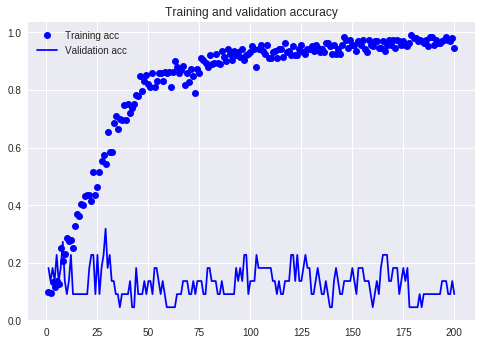

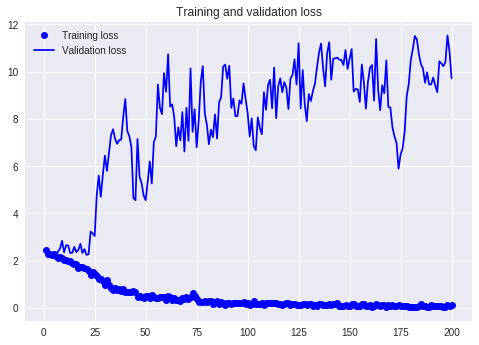

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
result = model.evaluate(test_data, test_label)